**Importing the dataset from kaggle and setting up the directories**

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soutriksarangi","key":"8e71ef863f90199b2cdd6c6b22a05f89"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d arashnic/hr-ana

  0% 0.00/913k [00:00<?, ?B/s]
100% 913k/913k [00:00<00:00, 109MB/s]


In [9]:
! mkdir hr

In [10]:
! unzip hr-ana.zip -d hr

Archive:  hr-ana.zip
  inflating: hr/test.csv             
  inflating: hr/train.csv            


In [14]:
import pandas as pd
train = pd.read_csv('hr/train.csv')
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [15]:
import pandas as pd
test = pd.read_csv('hr/test.csv')
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


 **Examining the dataset**

In [16]:
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 13)
Shape of the Test Data : (23490, 12)


In [17]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [18]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score'],
      dtype='object')

**Descriptive Analysis of the data**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import imblearn

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

In [19]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [20]:
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [21]:
train.describe().style.background_gradient(cmap = 'copper')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Thus, it can be seen that we don't have many outliers in the dataset and can be kept for training

In [22]:
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


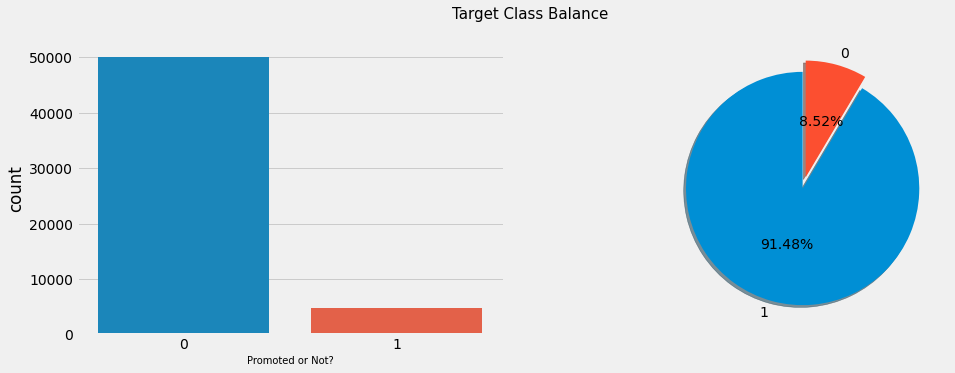

In [28]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

Thus, the target class of our training data is highly imbalanced

In [30]:


# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# lets check the head
train_missing_data.style.bar(color = ['gold'])

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000
no_of_trainings,0,0.000000,0.000000,0.000000


In [32]:
train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [33]:
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [66]:
cats = [c for c in train.columns if train[c].dtypes=='object']
nums = [c for c in train.columns if c not in cats]
print(cats)
print(nums)

['department', 'region', 'education', 'gender', 'recruitment_channel']
['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score']


In [55]:
true_cats = ['department', 'region', 'education', 'gender', 'recruitment_channel','awards_won?', 
             'previous_year_rating','length_of_service', 'no_of_trainings']

In [56]:
true_nums = [c for c in train.columns if c not in true_cats]
true_nums.remove('is_promoted')

**Outliers Detection**

In [34]:
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,0,49,0
1,65141,1,30,5.0,4,0,60,0
2,7513,1,34,3.0,7,0,50,0
3,2542,2,39,1.0,10,0,50,0
4,48945,1,45,3.0,2,0,73,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


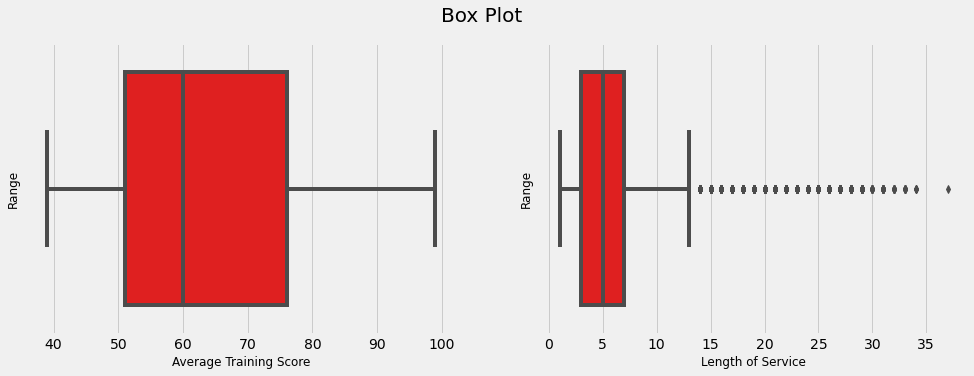

In [35]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [36]:
train = train[train['length_of_service'] > 13]

**Univariate analysis of the data**

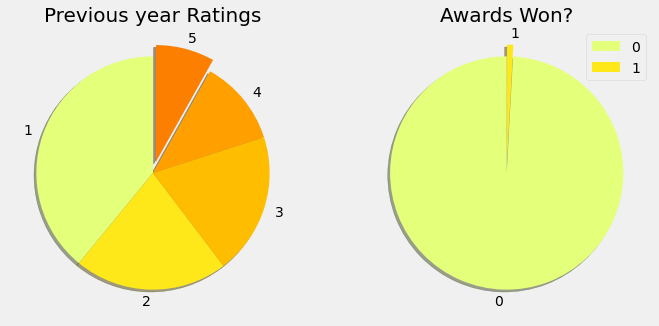

In [37]:
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


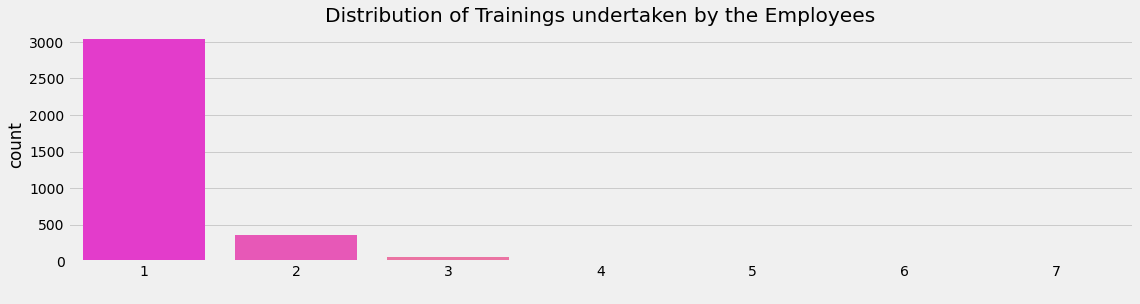

In [38]:
plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

 It is clearly visible that 80 % of the employees have taken the training only once, and there are negligible no. of employees, who took trainings more than thrice.

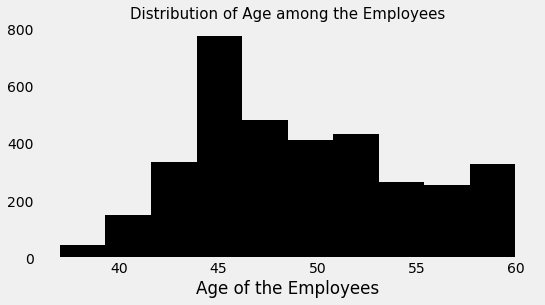

In [39]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

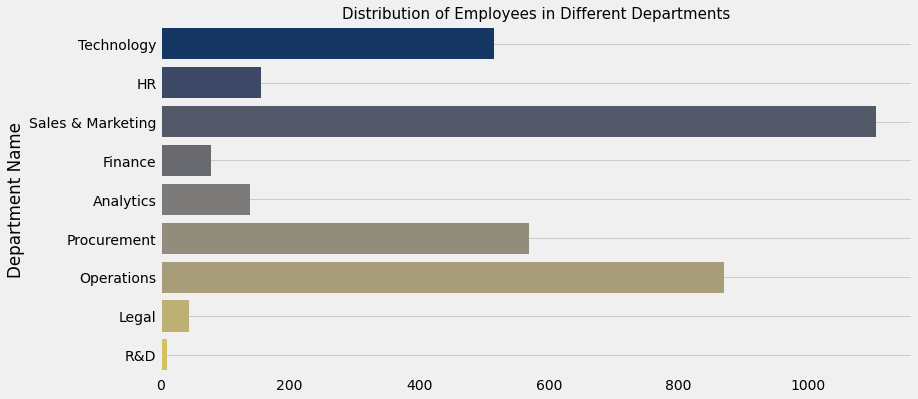

In [41]:
 #lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()


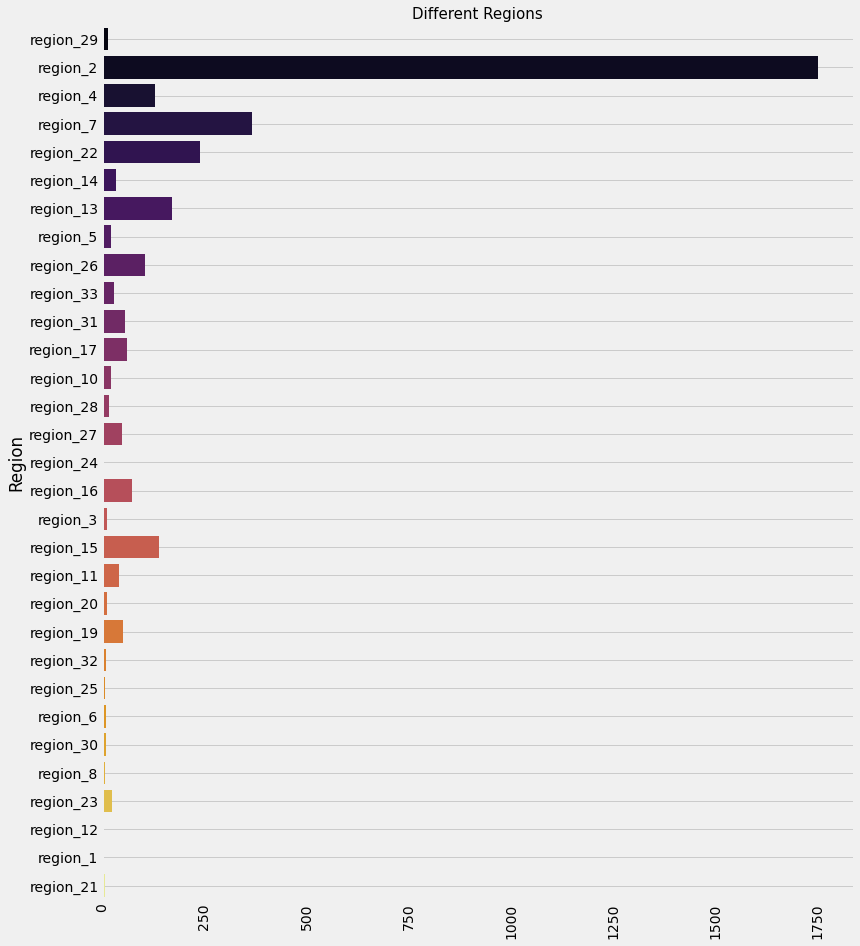

In [42]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

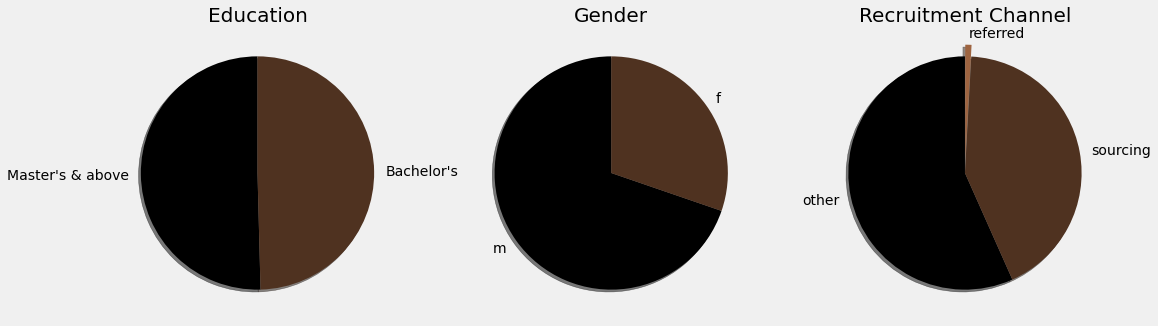

In [44]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors,  shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode=explode,shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

**Bivariate Analysis**

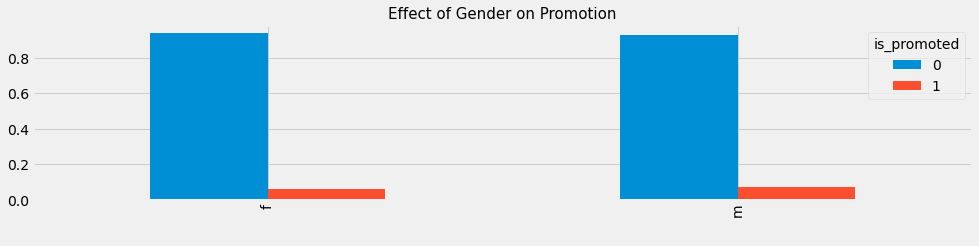

In [46]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

we have already seen that the Females are in Minority, but when it comes to Promotion, they are competing with their Men Counterparts neck-to-neck

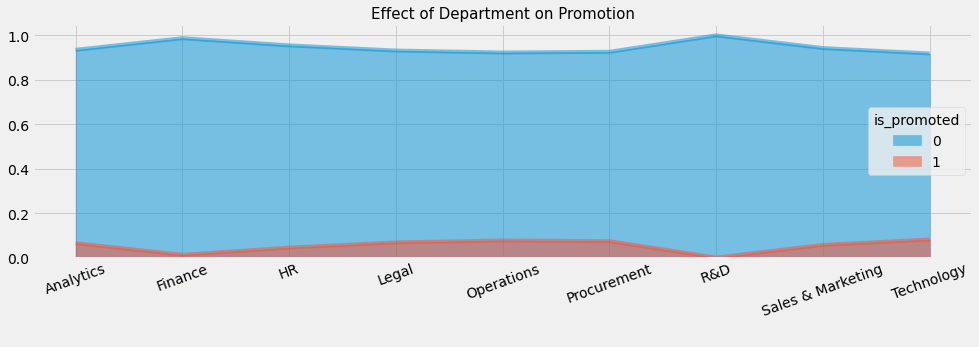

In [48]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

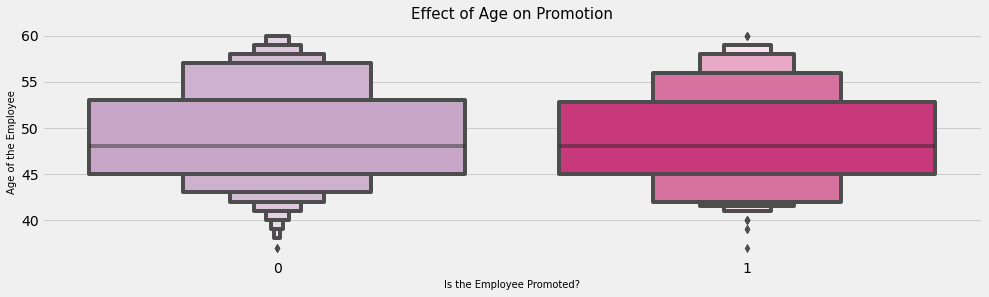

In [49]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

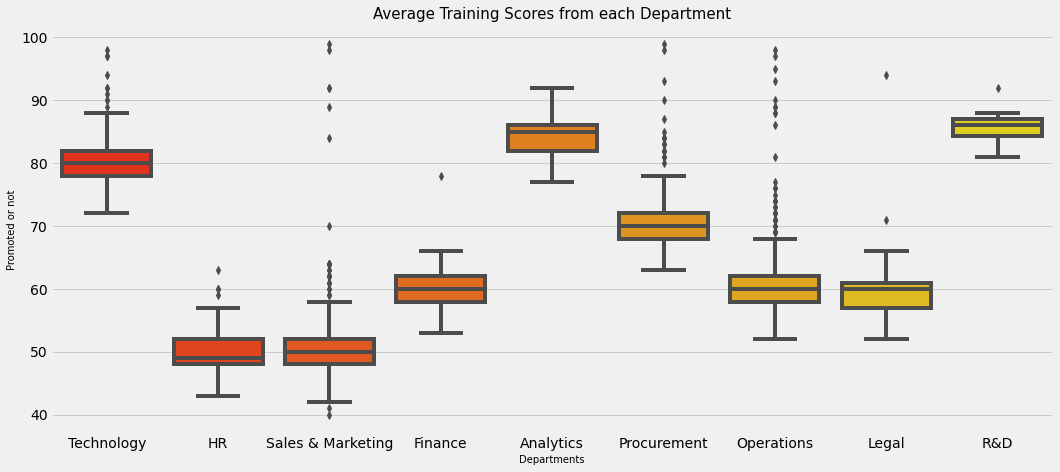

In [50]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

**Multivariate Analysis**

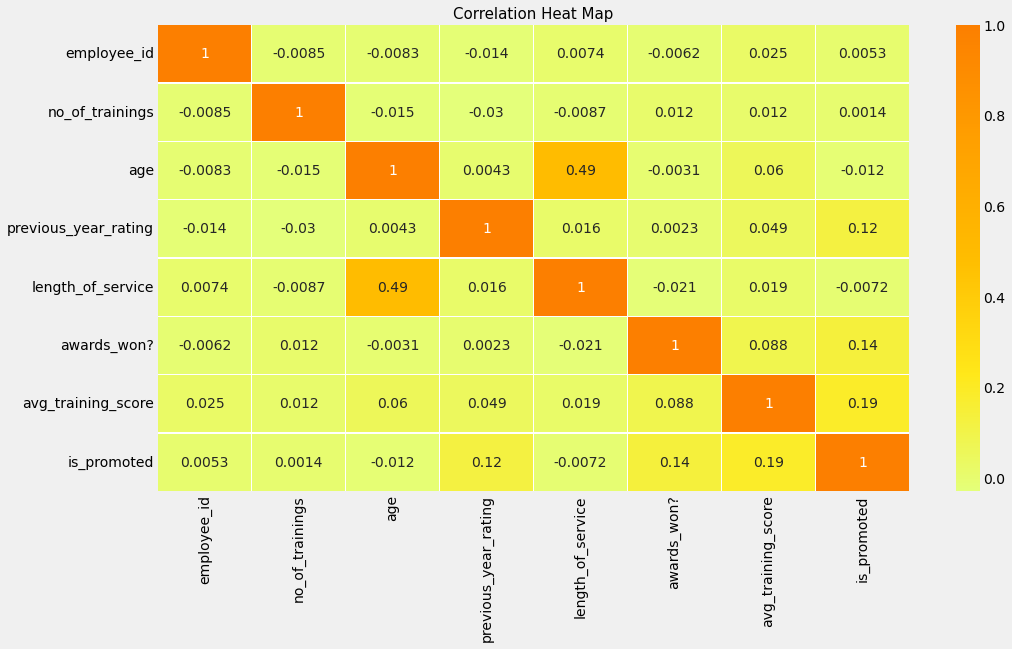

In [51]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

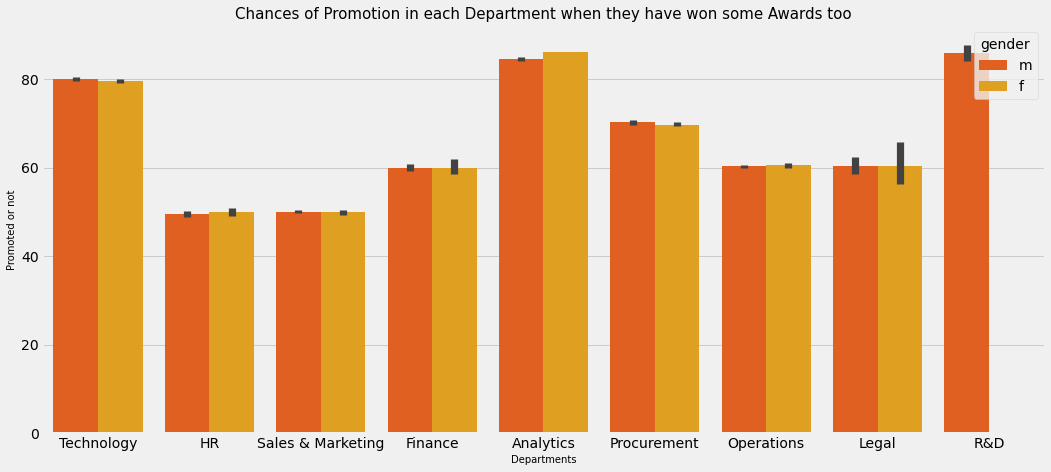

In [52]:
# lets check the relation of Departments and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['avg_training_score'], hue = train['gender'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

**Inspecting the distributions via histogram**

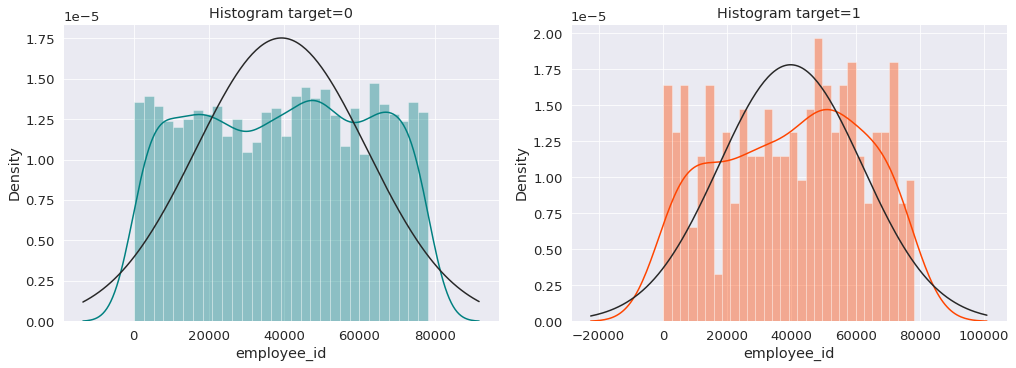

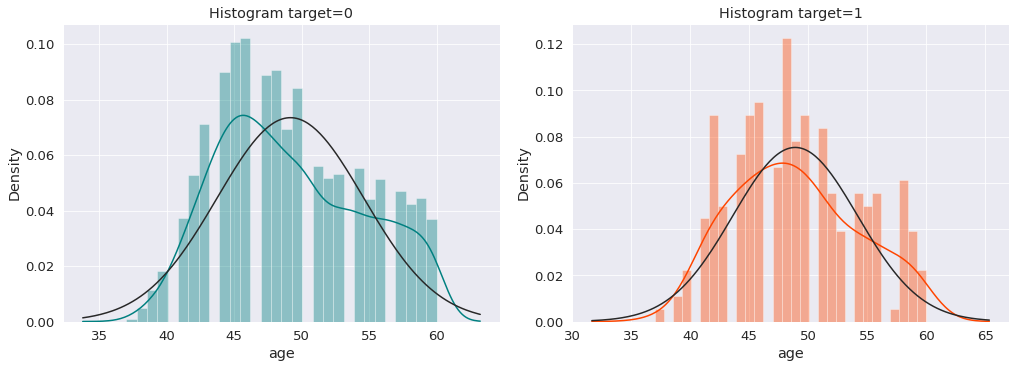

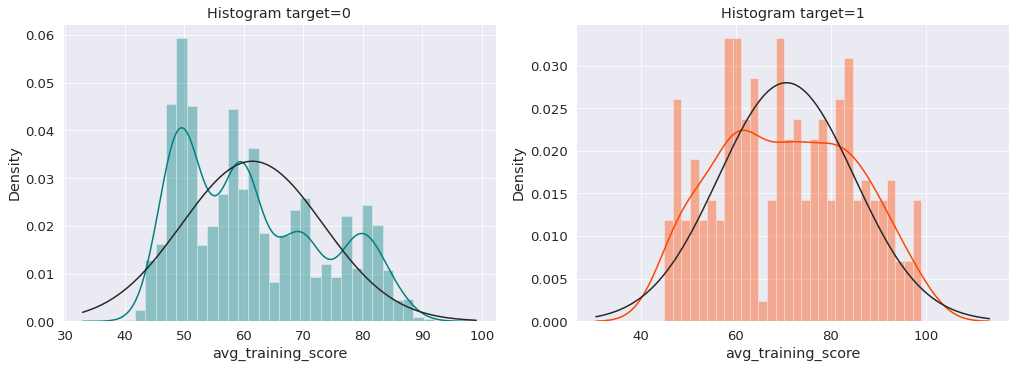

In [60]:
from scipy.stats import norm
import matplotlib.gridspec as gridspec

sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
for c in true_nums:
    
    fig = plt.figure(constrained_layout=True, figsize=(14,5))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title('Histogram target=0')
    sns.distplot(train[train.is_promoted==0].loc[:,c].dropna(),bins=30, fit=norm, norm_hist=True,color='teal' , ax = ax1)
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title('Histogram target=1')
    sns.distplot(train[train.is_promoted==1].loc[:,c].dropna(), bins=30, fit=norm, norm_hist=True,color='orangered' , ax = ax2)

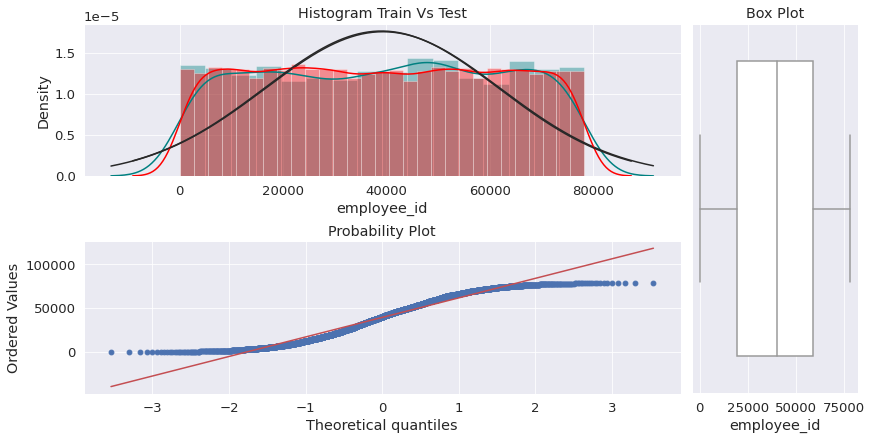

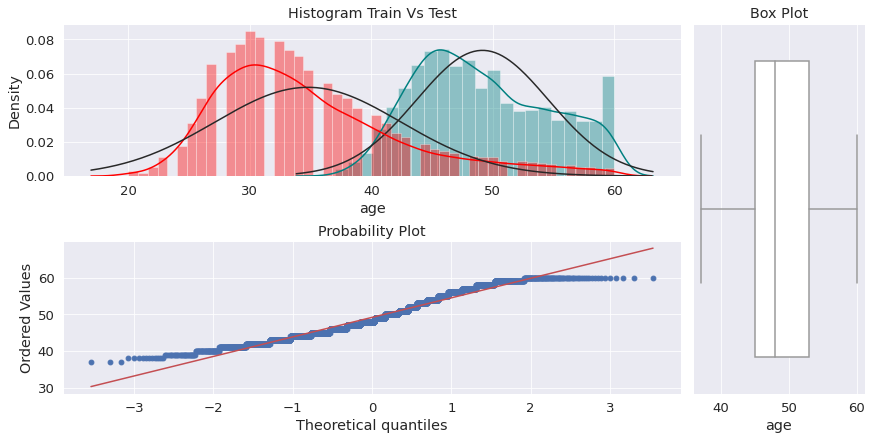

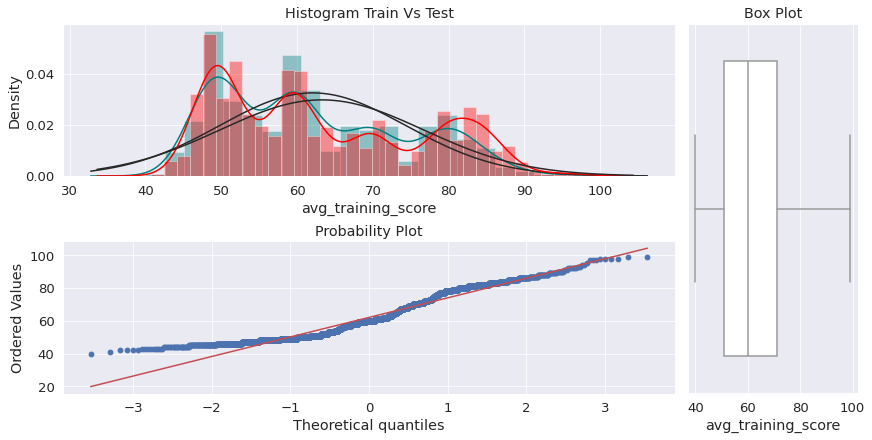

In [63]:
from scipy.stats import norm

sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
for c in true_nums:
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram Train Vs Test')
    ## plot the histogram. 
    sns.distplot(train.loc[:,c].dropna(),fit=norm, norm_hist=True,color='teal' , ax = ax1)
    sns.distplot(test.loc[:,c].dropna(),  fit=norm, norm_hist=True,color='red' , ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(train.loc[:,c].dropna(), plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(train.loc[:,c].dropna(), orient='v', ax = ax3, color='white' );

**Building data with category encodings**

In [64]:
from sklearn.impute import SimpleImputer
target = train.pop('is_promoted')

data = pd.concat([train, test], axis=0)
si = SimpleImputer(strategy= 'most_frequent')
data['education'] = si.fit_transform(data.education.values.reshape(-1, 1))
si = SimpleImputer(strategy='mean')
data['previous_year_rating'] = si.fit_transform(data.previous_year_rating.values.reshape(-1, 1))
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

Label Encoder

In [67]:
from sklearn.preprocessing import LabelEncoder
datal = data.copy()
for c in cats:
    le = LabelEncoder()
    datal[c] = le.fit_transform(datal[c])
    
train_le = datal.iloc[:len(train)]
test_le = datal.iloc[len(train):]
train_le.shape, test_le.shape

((3489, 12), (23490, 12))

In [69]:
data_oh = pd.get_dummies(data)
train_oh = data_oh.iloc[:len(train)]
test_oh = data_oh.iloc[len(train):]
train_oh.shape, test_oh.shape

((3489, 58), (23490, 58))

Scaling the data

In [70]:
from sklearn.preprocessing import StandardScaler, RobustScaler
ss = StandardScaler()
train_le = ss.fit_transform(train_le)
test_le = ss.fit_transform(test_le)

train_oh = ss.fit_transform(train_oh)
test_oh = ss.fit_transform(test_oh)

**Training with Logistic Regression**

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
scores = []
oof = np.zeros(len(train))
y_le = target.values
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_, (train_ind, val_ind) in enumerate(folds.split(train_le, y_le)):
    print('fold:', fold_)
    X_tr, X_test = train_le[train_ind], train_le[val_ind]
    y_tr, y_test = y_le[train_ind], y_le[val_ind]
    clf = LogisticRegression(max_iter=200, random_state=2020)
    clf.fit(X_tr, y_tr)
    oof[val_ind]= clf.predict_proba(X_test)[:, 1]
    y = clf.predict_proba(X_tr)[:,1] 
    print('train:',roc_auc_score(y_tr, y),'val :' , roc_auc_score(y_test, (oof[val_ind])))
    print(20 * '-')
    
    scores.append(roc_auc_score(y_test, oof[val_ind]))
    
    
    
print('log reg  roc_auc=  ', np.mean(scores))
np.save('oof_rf', oof)

fold: 0
train: 0.7499753567115996 val : 0.6923881426283622
--------------------
fold: 1
train: 0.7325689806714475 val : 0.7627872013596103
--------------------
fold: 2
train: 0.7364975315639452 val : 0.7617740301336733
--------------------
fold: 3
train: 0.7507844780140794 val : 0.6901983854626271
--------------------
fold: 4
train: 0.7417924959963396 val : 0.7369598610832833
--------------------
log reg  roc_auc=   0.7288215241335113


In [72]:
from sklearn.metrics import *
oof_rnd = np.where(oof > 0.5, 1, 0)

f1_score(target, oof_rnd)

0.09638554216867469

In [73]:
recall_score(target, oof_rnd)

0.05128205128205128

Logistic regression with one-hot encoded data

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
scores = []
oof = np.zeros(len(train_oh))
y_le = target.values
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_, (train_ind, val_ind) in enumerate(folds.split(train_oh, y_le)):
    print('fold:', fold_)
    X_tr, X_test = train_oh[train_ind], train_oh[val_ind]
    y_tr, y_test = y_le[train_ind], y_le[val_ind]
    clf = LogisticRegression(max_iter=200, random_state=2020)
    clf.fit(X_tr, y_tr)
    oof[val_ind]= clf.predict_proba(X_test)[:, 1]
    y = clf.predict_proba(X_tr)[:,1] 
    print('train:',roc_auc_score(y_tr, y),'val :' , roc_auc_score(y_test, (oof[val_ind])))
    print(20 * '-')
    
    scores.append(roc_auc_score(y_test, oof[val_ind]))
    
    
    
print('log reg  roc_auc=  ', np.mean(scores))
np.save('oof_rf', oof)

fold: 0
train: 0.8402293468707133 val : 0.7716769617936399
--------------------
fold: 1
train: 0.8169476001544314 val : 0.8591038337091871
--------------------
fold: 2
train: 0.8309408807511276 val : 0.7952413635323724
--------------------
fold: 3
train: 0.8432686857734297 val : 0.7493545118802497
--------------------
fold: 4
train: 0.8416205020100009 val : 0.7566619915848527
--------------------
log reg  roc_auc=   0.7864077325000604


In [75]:
oof_rnd = np.where(oof > 0.5, 1, 0)
f1_score(target, oof_rnd)

0.5

In [76]:
recall_score(target, oof_rnd)

0.33760683760683763

Plotting the Confusion Matrix

In [78]:
class_names=np.array(['0','1'])

# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

**Implementing the Support Vector Machine model**

In [79]:
y = target
x = train_le


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.9387316374059477
test accuracy: 0.9312320916905444


In [80]:
from sklearn.metrics import classification_report
prediction_SVM_all = svm.predict(x_test)
print(classification_report(y_test, prediction_SVM_all, target_names=class_names))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       649
           1       0.67      0.04      0.08        49

    accuracy                           0.93       698
   macro avg       0.80      0.52      0.52       698
weighted avg       0.91      0.93      0.90       698



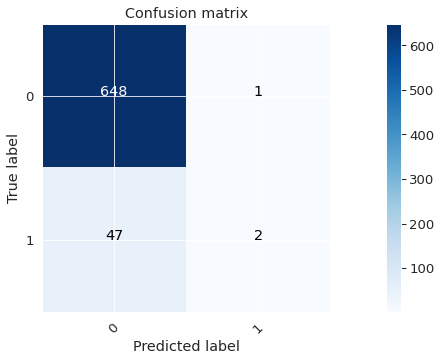

In [81]:
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [82]:
y = target
x = train_oh


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.9383733428878538
test accuracy: 0.9297994269340975


In [83]:
prediction_SVM_all = svm.predict(x_test)
print(classification_report(y_test, prediction_SVM_all, target_names=class_names))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       649
           1       0.00      0.00      0.00        49

    accuracy                           0.93       698
   macro avg       0.46      0.50      0.48       698
weighted avg       0.86      0.93      0.90       698



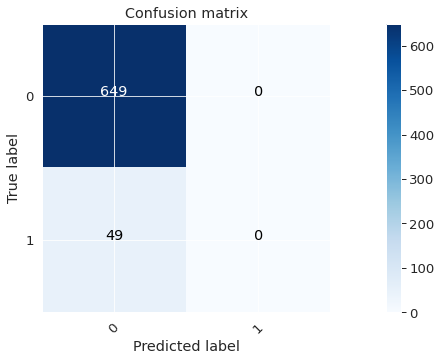

In [84]:
prediction_SVM_all = svm.predict(x_test)
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

**Random Forest Classification**

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(x_train,y_train)
print("%.4f" % rf.oob_score_)

0.9405


In [86]:
rf.feature_importances_

array([1.38234797e-01, 1.78480147e-02, 8.75484300e-02, 5.08636343e-02,
       7.29112315e-02, 2.38606310e-02, 3.12295332e-01, 9.94926638e-03,
       2.93892407e-03, 6.84702745e-03, 4.49324779e-03, 2.63842880e-02,
       1.62977381e-02, 7.65794624e-04, 2.38857229e-02, 1.37422802e-02,
       0.00000000e+00, 2.58200394e-03, 3.90614276e-03, 6.76557946e-06,
       1.11934237e-02, 3.00121573e-03, 6.95274390e-03, 7.59933272e-03,
       2.96838054e-03, 0.00000000e+00, 5.19527351e-04, 1.13840433e-02,
       8.67123851e-05, 2.38439465e-05, 8.48599784e-03, 4.93830484e-03,
       5.23370881e-05, 5.23544081e-05, 5.61829840e-03, 1.47762819e-02,
       4.69425001e-03, 6.48382832e-03, 2.28587725e-05, 2.00435770e-05,
       1.95942912e-03, 4.81932039e-05, 8.06350557e-04, 0.00000000e+00,
       8.11905401e-03, 1.40789171e-03, 2.08514094e-05, 1.57775370e-02,
       1.30911440e-03, 0.00000000e+00, 1.00058822e-02, 0.00000000e+00,
       1.05829444e-02, 1.07387212e-02, 1.07235158e-02, 9.86813834e-03,
      

In [87]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:5]

,variable,importance
6,age,0.312295
0,department,0.138235
2,education,0.087548
4,recruitment_channel,0.072911
3,gender,0.050864
